In [13]:
import itertools
import copy
from collections import namedtuple
from enum import Enum
import math
from functools import reduce
from operator import mul

import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr
import seaborn as sns
from ipywidgets import interact
# sns.set(style="darkgrid")

%matplotlib inline
# %matplotlib notebook
import matplotlib.style as style
style.use('seaborn-poster') #sets the size of the charts
style.use('ggplot')

In [204]:
def getEmptyDataFrame() -> pd.DataFrame:
    """
    Gets an empty dataframe used to represent the training information
    """
    DF_COLUMNS = ['Epoch', 'Loss', 'Run Type', 'Model', 'config']
    return pd.DataFrame(columns=DF_COLUMNS)

def graphCompareModelLosses(data, dep_axis_title, graph_title, output_name):
    """
    Args:
        data (list): List of dataframe loss data for each model
        graph_title (str): string name of graph title
        output_name (str): string name of the output png (not including extension)
        
    Outputs:
        Seaborn plot of loss data for training/testing the models
    """
    # Create dataframes for data input and join
    df = getEmptyDataFrame()
    
    # Join dataframes
    for d in data:
        df = df.append(d, ignore_index=True)

    sns.set_context("paper", rc={"font.size":20,"axes.titlesize":20,"axes.labelsize":20, 
                                 'xtick.labelsize': 15, 'ytick.labelsize': 15, 'legend.fontsize': 20}) 
    fig, ax = plt.subplots()
#     fig.set_size_inches(11.7, 8.27)
    ax.set_title(graph_title)
#     ax.set
    g = sns.lineplot(x="Epoch", y="Loss", hue="Model", style="Run Type", data=df)
    g.set(ylabel=dep_axis_title)
    ax.get_yaxis().set_major_formatter(
    tkr.FuncFormatter(lambda x, p: format(int(x), ',')))
#     ax.legend(bbox_to_anchor=(1.1, 1.05))
    fig.savefig("../pictures/" + output_name + '.png', facecolor=fig.get_facecolor(), dpi=600)

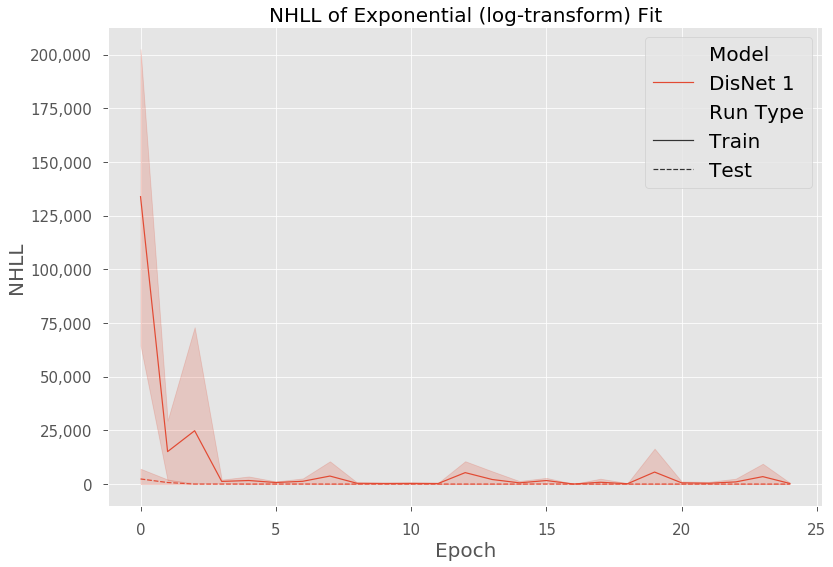

In [70]:
data = []
for i in range(0, 18):
    data.append(pd.read_pickle("../gridsearch_dfs/df_INVERSE_GAUSSIAN_DOUBLE_{}.pkl".format(i+1)))
data = [data[0]]
# del data[6]
# del data[-1]
graphCompareModelLosses(data, dep_axis_title="NHLL", 
                        graph_title="NHLL of Exponential (log-transform) Fit", output_name="test")

In [66]:
# pd.read_pickle("../gridsearch_dfs/df_LOG_NORMAL_CONSTANT_{}.pkl".format(i+1))
# data = [data[3], data[7], data[0]]

# pd.read_pickle("../gridsearch_dfs/df_LOG_NORMAL_DOUBLE_{}.pkl".format(i+1))
# data = [data[0], data[1], data[2], data[5], data[6], data[8], data[10]]
# gradient_clipping 0.1 or 0.01
# First conv side 8 or 16
# start rate 1e-3
#data[6], data[2], data[8]
# [data[1], data[2], data[3], data[6], data[7], data[9], data[11]]

# pd.read_pickle("../gridsearch_dfs/df_LOG_NORMAL_HALF_{}.pkl".format(i+1))
# data = [data[0], data[5], data[6], data[1], data[14]]

# -----------------------------------
# pd.read_pickle("../gridsearch_dfs/df_INVERSE_GAUSSIAN_DOUBLE_{}.pkl".format(i+1))
# data = [data[0], data[1]]
# pd.read_pickle("../gridsearch_dfs/df_INVERSE_GAUSSIAN_HALF_{}.pkl".format(i+1))
# data = [data[0], data[3]]

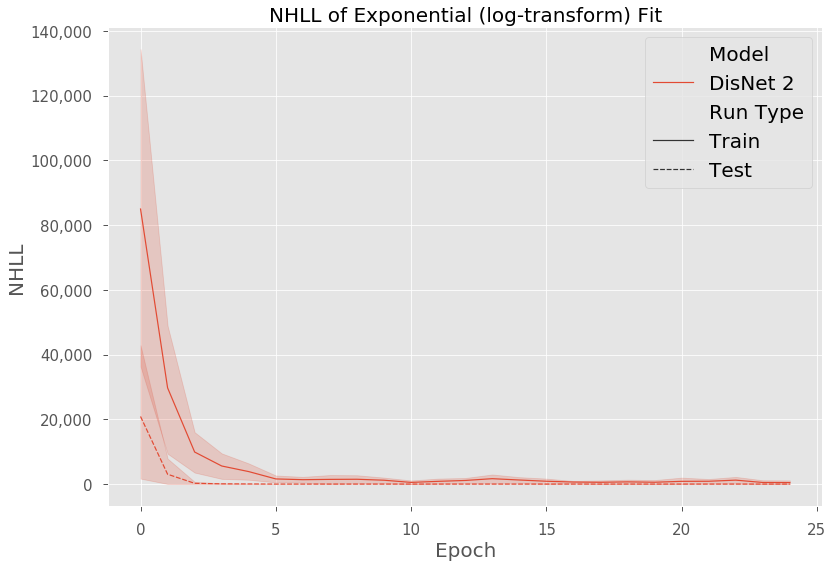

In [88]:
data1 = []
data2 = []
data3 = []
data = []
for i in range(0, 18):
    data.append(pd.read_pickle("../gridsearch_dfs/df_LOG_NORMAL_DOUBLE_{}.pkl".format(i+1)))
data = [data[1]]
# del data[6]
# del data[-1]
graphCompareModelLosses(data, dep_axis_title="NHLL", 
                        graph_title="NHLL of Exponential (log-transform) Fit", output_name="test")

In [80]:
data = pd.read_pickle("../gridsearch_dfs/df_test.pkl")
data = data[data['Run Type'] != "Train"]
# data = data[data['Run Type'] != "KS"]
data = data[data['Epoch'] != 0]
data
# graphCompareModelLosses([data], dep_axis_title="NHLL", 
#                         graph_title="NHLL of Exponential (log-transform) Fit", output_name="test")

,Epoch,Loss,Run Type,Model
5,1,66432.769648,Train_Eval,DisNet
6,1,58160.613335,Test,DisNet
7,1,41.370558,KS,DisNet
9,2,14464.392430,Train_Eval,DisNet
10,2,14464.401193,Test,DisNet
...,...,...,...,...
54,13,42528.960791,Test,DisNet
55,13,57.868020,KS,DisNet
57,14,41395.539398,Train_Eval,DisNet
58,14,41395.818144,Test,DisNet


In [103]:
def graphCompareModelKS(data, dep_axis_title, graph_title, output_name=None):
    """
    Args:
        data (list): List of dataframe loss data for each model
        graph_title (str): string name of graph title
        output_name (str): string name of the output png (not including extension)
        
    Outputs:
        Seaborn plot of loss data for training/testing the models
    """
    # Create dataframes for data input and join
    df = getEmptyDataFrame()
    
    # Join dataframes
    for d in data:
        df = df.append(d[d['Run Type'] == "KS"], ignore_index=True)

    sns.set_context("paper", rc={"font.size":20,"axes.titlesize":20,"axes.labelsize":20, 
                                 'xtick.labelsize': 15, 'ytick.labelsize': 15, 'legend.fontsize': 20}) 
    fig, ax = plt.subplots()
    ax.set_title(graph_title)
    g = sns.lineplot(x="Epoch", y="Loss", hue="Model", style="Run Type", data=df)
    g.set(ylabel=dep_axis_title)
    ax.get_yaxis().set_major_formatter(
    tkr.FuncFormatter(lambda x, p: format(int(x), ',')))
    if output_name != None:
        fig.savefig("../pictures/" + output_name + '.png', facecolor=fig.get_facecolor())

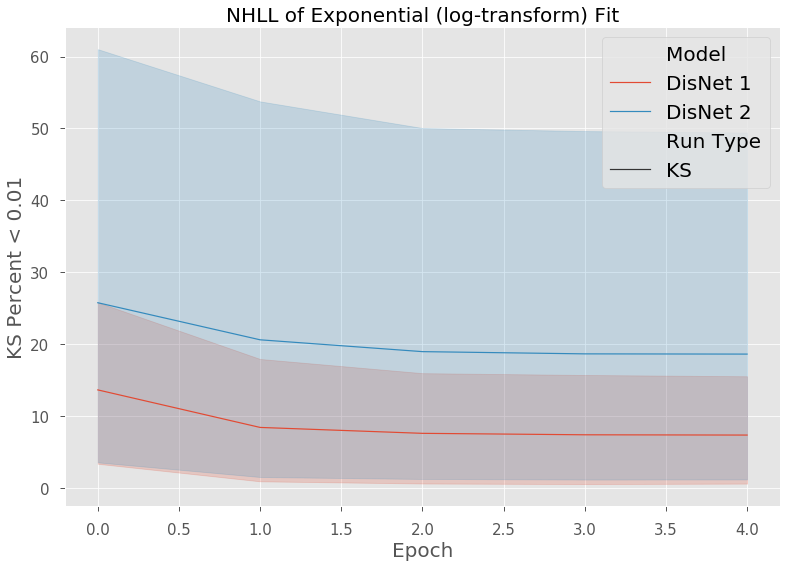

In [112]:
data = []
for i in range(1, 3):
    data.append(pd.read_pickle("../ssl_compare_dfs/df_{}.pkl".format(i)))
graphCompareModelKS(data, dep_axis_title="KS Percent < 0.01", graph_title="NHLL of Exponential (log-transform) Fit")

In [205]:
def graphCompareModelValidationLoss(data, dep_axis_title, graph_title, samps=None, scale=None, output_name=None):
    """
    Args:
        data (list): List of dataframe loss data for each model
        graph_title (str): string name of graph title
        output_name (str): string name of the output png (not including extension)
        
    Outputs:
        Seaborn plot of loss data for training/testing the models
    """
    sns.set_context("paper", rc={"font.size":20,"axes.titlesize":20,"axes.labelsize":20, 
                                 'xtick.labelsize': 15, 'ytick.labelsize': 15, 'legend.fontsize': 10}) 
    if samps:
        data = data[data['config'].str.contains('{}'.format(samps))]
    fig, ax = plt.subplots()
    ax.set_title(graph_title)
    g = sns.lineplot(x="Epoch", y="Loss", hue="config", style="Run Type", data=data)
    g.set(ylabel=dep_axis_title)
    ax.get_yaxis().set_major_formatter(tkr.FuncFormatter(lambda x, p: format(int(x), ',')))
    if scale:
        plt.yscale('symlog')
    if output_name != None:
        fig.savefig("../pictures/" + output_name + '.png', facecolor=fig.get_facecolor(), dpi=600)

# SSL

In [201]:
data = []
max_samples = [99, 198, 396, 792, 1584, 3168]
lbs = [0, 1, 2, 4]
df_lognormal_ssl = getEmptyDataFrame()

# Join data
for ms in max_samples:
    for lb in lbs:
        try:
            df_lognormal_ssl = df_lognormal_ssl.append(pd.read_pickle("../ssl_compare_dfs/df_{}_{}_{}.pkl".format("LOG_NORMAL_CONSTANT", ms, lb)), 
                                           ignore_index=True)
        except:
            pass
# Filter
df_lognormal_ssl_ks = df_lognormal_ssl[df_lognormal_ssl['Run Type'] == "KS"]
df_lognormal_ssl_test = df_lognormal_ssl[df_lognormal_ssl['Run Type'] == "Test"]
df_lognormal_ssl_eval = df_lognormal_ssl[df_lognormal_ssl['Run Type'] == "Train_Eval"]
df_lognormal_ssl_train = df_lognormal_ssl[(df_lognormal_ssl['Run Type'] == "Test") | (df_lognormal_ssl['Run Type'] == "Train_Eval")]

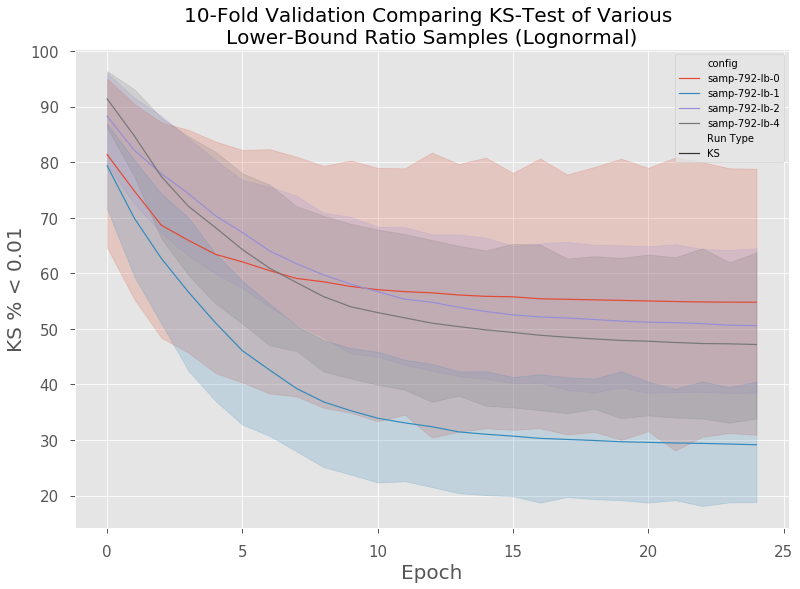

In [202]:
samps = 792

# dict_lognorm = {'dist': 'Lognormal', 'title': None, 'dep_axis': None,}
# dict_graphs = {'lognorm' : }

graphCompareModelValidationLoss(df_lognormal_ssl_ks, dep_axis_title="KS % < 0.01", graph_title="10-Fold Validation Comparing KS-Test of Various \nLower-Bound Ratio Samples (Lognormal)",
                               samps=samps)

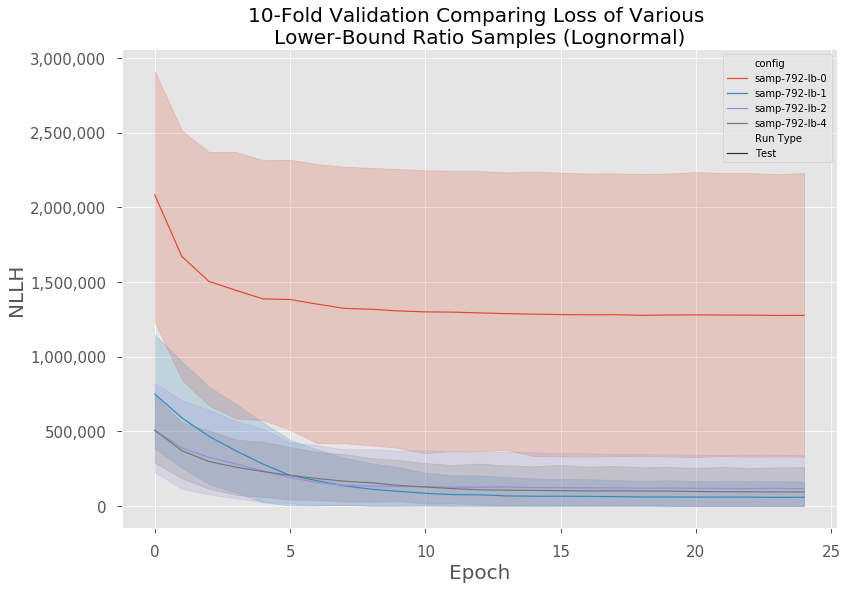

In [203]:
samps = 792
graphCompareModelValidationLoss(df_lognormal_ssl_test, dep_axis_title="NLLH", graph_title="10-Fold Validation Comparing Loss of Various \nLower-Bound Ratio Samples (Lognormal)",
                               samps=samps, scale=False)

# Datadiv

In [172]:
data = []
max_samples = [4]
lbs = [0, 1, 2, 4]
df_lognormal_div = getEmptyDataFrame()

# Join data
for ms in max_samples:
    for lb in lbs:
        try:
            df_lognormal_div = df_lognormal_div.append(pd.read_pickle("../datadiv_compare_dfs/df_{}_{}_{}.pkl".format("LOG_NORMAL_CONSTANT", ms, lb)), 
                                               ignore_index=True)
        except:
            pass
# Filter
df_lognormal_div_ks = df_lognormal_div[df_lognormal_div['Run Type'] == "KS"]
df_lognormal_div_test = df_lognormal_div[df_lognormal_div['Run Type'] == "Test"]
df_lognormal_div_eval = df_lognormal_div[df_lognormal_div['Run Type'] == "Train_Eval"]
df_lognormal_div_train = df_lognormal_div[(df_lognormal_div['Run Type'] == "Test") | (df_lognormal_div['Run Type'] == "Train_Eval")]

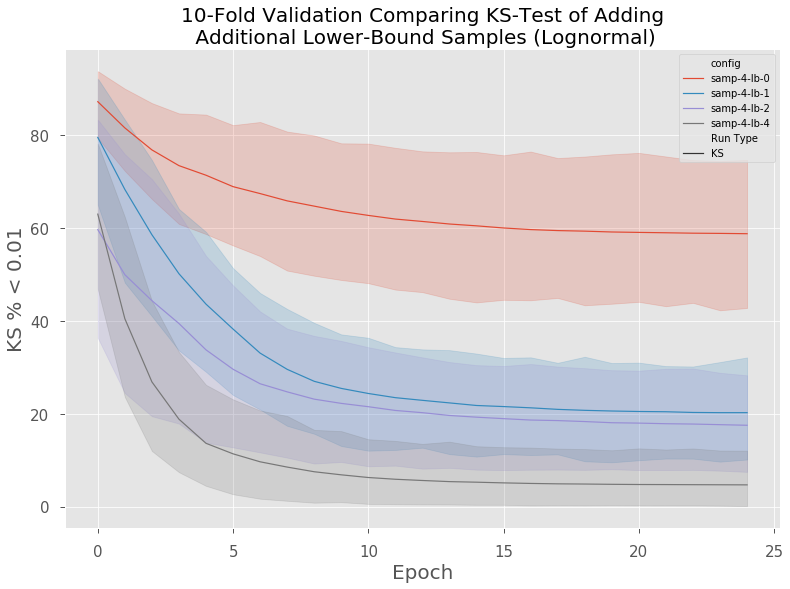

In [207]:
graphCompareModelValidationLoss(df_lognormal_div_ks, dep_axis_title="KS % < 0.01", graph_title="10-Fold Validation Comparing KS-Test of Adding\n Additional Lower-Bound Samples (Lognormal)",
                               samps=None, scale=False, output_name="lognormal_ks_datadiv")

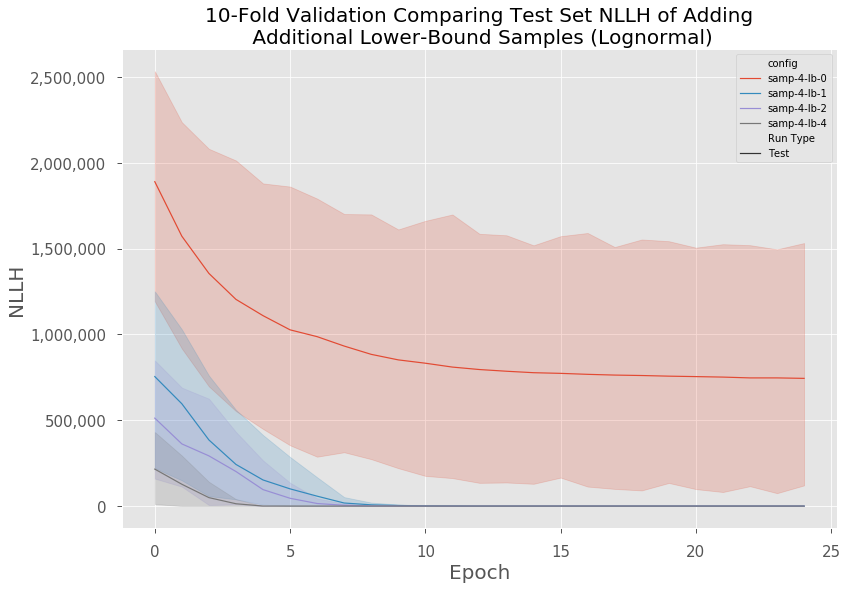

In [209]:
graphCompareModelValidationLoss(df_lognormal_div_test, dep_axis_title="NLLH", graph_title="10-Fold Validation Comparing Test Set NLLH of Adding\n Additional Lower-Bound Samples (Lognormal)",
                               samps=None, scale=False, output_name="lognormal_nllh_datadiv")

In [121]:
pd.set_option('display.max_rows', 500)
df_lognormal_div_test[df_lognormal_div_test['Model'] == 'DisNet 5']

,Epoch,Loss,Run Type,Model,config
2402,0,0.488564,Test,DisNet 5,samp-4-lb-4
2406,1,-0.362010,Test,DisNet 5,samp-4-lb-4
2410,2,-0.599331,Test,DisNet 5,samp-4-lb-4
2414,3,-0.697169,Test,DisNet 5,samp-4-lb-4
2418,4,-0.739705,Test,DisNet 5,samp-4-lb-4
2422,5,-0.759458,Test,DisNet 5,samp-4-lb-4
2426,6,-0.769852,Test,DisNet 5,samp-4-lb-4
2430,7,-0.775470,Test,DisNet 5,samp-4-lb-4
2434,8,-0.780657,Test,DisNet 5,samp-4-lb-4
2438,9,-0.784448,Test,DisNet 5,samp-4-lb-4
